In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [26]:
class Value():
    def __init__(self, data, _children=(), label="", _op="", _grad=0): 
        self.data = data
        self.grad = _grad
        self._op  = _op
        self.label = label
        self._prev = set(_children)
        
    def __repr__(self) -> str:
        return f"Value({self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), _op="+")

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), _op="*")
    
    def tanh(self):
        return 0
    

In [27]:
from graphviz import Digraph
diam = Digraph(format="svg", graph_attr={"rankdir":"LR"})
diam
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev: 
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    diam = Digraph(format="svg", graph_attr={"rankdir":"LR"})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        diam.node(name=uid, label="{%s | data %.4f | grad %.4f} " %(n.label, n.data, n.grad), shape="record")
        if n._op:
            diam.node(name=uid + n._op, label=n._op)
            diam.edge(uid + n._op, uid)
    
    for n1, n2 in edges: 
        diam.edge(str(id(n1)), str(id(n2)) + n2._op)
    return diam

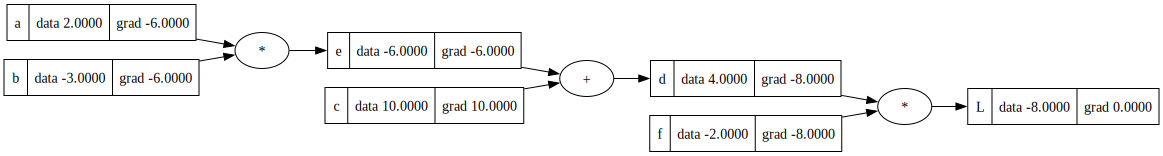

In [30]:
draw_dot(L)

In [31]:
a = Value(2.0, label="a")

b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b; e.label = "e"
d = e + c; d.label = "d"

f = Value(-2.0, label="f")
L = d * f; L.label="L"